# 1. GPU/시스템 정보 확인

In [ ]:
# GPU/시스템 정보 확인
%%bash
echo "========================================================================"
echo "🖥️ 시스템 정보"
echo "========================================================================"
echo ""
echo "📅 현재 시간: $(date '+%Y-%m-%d %H:%M:%S')"
echo ""
echo "🔧 GPU 정보:"
nvidia-smi --query-gpu=name,memory.total,driver_version --format=csv,noheader
echo ""
echo "🔧 CUDA 버전:"
nvcc --version 2>/dev/null | grep "release" || echo "nvcc not found"
echo ""
echo "🔧 Python 버전:"
python --version
echo ""
echo "🔧 디스크 공간:"
df -h /content | tail -1 | awk '{print "   사용: " $3 " / " $2 " (" $5 " 사용중)"}'
echo ""
echo "========================================================================"

🖥️ 시스템 정보

📅 현재 시간: 2026-01-15 05:06:15

🔧 GPU 정보:
NVIDIA A100-SXM4-40GB, 40960 MiB, 550.54.15

🔧 CUDA 버전:
Cuda compilation tools, release 12.5, V12.5.82

🔧 Python 버전:
Python 3.12.12

🔧 디스크 공간:
   사용: 39G / 236G (17% 사용중)



# 2. Miniconda + UV 설치

In [ ]:
# Miniconda + UV 설치
%%bash
set -e

echo "========================================================================"
echo "📦 Miniconda + UV 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

# Miniconda 설치
if [ ! -d "/content/conda" ]; then
    echo "1️⃣ Miniconda 다운로드 및 설치..."
    wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O /tmp/miniconda.sh
    bash /tmp/miniconda.sh -b -p /content/conda > /dev/null 2>&1
    rm /tmp/miniconda.sh
    echo "   ✅ Miniconda 설치 완료"
else
    echo "1️⃣ Miniconda 이미 설치됨"
fi

# UV 설치 (base 환경에)
if [ ! -f "/content/conda/bin/uv" ]; then
    echo "2️⃣ UV 설치..."
    /content/conda/bin/pip install uv -q
    echo "   ✅ UV 설치 완료"
else
    echo "2️⃣ UV 이미 설치됨"
fi

echo ""
echo "📋 UV 버전:"
/content/conda/bin/uv --version

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 Miniconda + UV 설치
📅 시작: 05:06:15

1️⃣ Miniconda 다운로드 및 설치...
   ✅ Miniconda 설치 완료
2️⃣ UV 설치...
   ✅ UV 설치 완료

📋 UV 버전:
uv 0.9.25

📅 완료: 05:06:31


# 3. Anaconda ToS 동의 + Python 3.10 환경 생성

In [ ]:
# Anaconda ToS 동의 + Python 3.10 conda 환경 생성
%%bash
set -e

echo "========================================================================"
echo "🐍 Python 3.10 conda 환경 생성"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

source /content/conda/bin/activate

# Anaconda Terms of Service 동의
echo "1️⃣ Anaconda Terms of Service 동의..."
conda config --set solver classic 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r 2>/dev/null || true
conda config --add channels conda-forge 2>/dev/null || true
conda config --set channel_priority flexible 2>/dev/null || true
echo "   ✅ 설정 완료"
echo ""

if [ ! -d "/content/conda/envs/openmmlab" ]; then
    echo "2️⃣ openmmlab 환경 생성 중..."
    conda create -n openmmlab python=3.10 -c conda-forge -y -q 2>&1 | tail -5
    echo "   ✅ 환경 생성 완료"
else
    echo "2️⃣ openmmlab 환경 이미 존재"
fi

echo ""
echo "📋 Python 버전 확인:"
/content/conda/envs/openmmlab/bin/python --version
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🐍 Python 3.10 conda 환경 생성
📅 시작: 05:06:31

1️⃣ Anaconda Terms of Service 동의...
accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
   ✅ 설정 완료

2️⃣ openmmlab 환경 생성 중...


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
   ✅ 환경 생성 완료

📋 Python 버전 확인:
Python 3.10.19

📅 완료: 05:07:08


# 4. NumPy 1.26.4 설치

In [ ]:
# NumPy 1.26.4 설치
%%bash
set -e

echo "========================================================================"
echo "📦 NumPy 1.26.4 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ NumPy 설치 중..."
$UV pip install numpy==1.26.4 --python $PY -q

echo ""
echo "📋 NumPy 버전 확인:"
$PY -c "import numpy; print(f'   NumPy: {numpy.__version__}')"
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 NumPy 1.26.4 설치
📅 시작: 05:07:08

1️⃣ NumPy 설치 중...

📋 NumPy 버전 확인:
   NumPy: 1.26.4

📅 완료: 05:07:09


# 5. PyTorch 2.1.2 + CUDA 11.8 설치

In [ ]:
# PyTorch 2.1.2 + CUDA 11.8 설치
%%bash
set -e

echo "========================================================================"
echo "🔥 PyTorch 2.1.2 + CUDA 11.8 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ PyTorch 설치 중 (약 1분 소요)..."
$UV pip install torch==2.1.2 torchvision==0.16.2 \
    --index-url https://download.pytorch.org/whl/cu118 \
    --python $PY -q

echo ""
echo "📋 설치 확인:"
$PY -c "
import torch
print(f'   PyTorch: {torch.__version__}')
print(f'   CUDA 사용 가능: {torch.cuda.is_available()}')
if torch.cuda.is_available():
    print(f'   GPU: {torch.cuda.get_device_name(0)}')
    print(f'   CUDA 버전: {torch.version.cuda}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔥 PyTorch 2.1.2 + CUDA 11.8 설치
📅 시작: 05:07:09

1️⃣ PyTorch 설치 중 (약 1분 소요)...

📋 설치 확인:
   PyTorch: 2.1.2+cu118
   CUDA 사용 가능: True
   GPU: NVIDIA A100-SXM4-40GB
   CUDA 버전: 11.8

📅 완료: 05:07:39


# 6. OpenMMLab 스택 설치

In [ ]:
# OpenMMLab 스택 설치 (mmcv, mmengine, mmdet)
%%bash
set -e

echo "========================================================================"
echo "📦 OpenMMLab 스택 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ mmcv 2.1.0 설치 중..."
$UV pip install mmcv==2.1.0 \
    -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.1/index.html \
    --python $PY -q
echo "   ✅ mmcv 설치 완료"

echo "2️⃣ mmengine 설치 중..."
$UV pip install mmengine==0.10.7 --python $PY -q
echo "   ✅ mmengine 설치 완료"

echo "3️⃣ mmdet 설치 중..."
$UV pip install mmdet==3.3.0 --python $PY -q
echo "   ✅ mmdet 설치 완료"

echo ""
echo "📋 설치 확인:"
$PY -c "
import mmcv
import mmengine
import mmdet
print(f'   mmcv: {mmcv.__version__}')
print(f'   mmengine: {mmengine.__version__}')
print(f'   mmdet: {mmdet.__version__}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 OpenMMLab 스택 설치
📅 시작: 05:07:39

1️⃣ mmcv 2.1.0 설치 중...
   ✅ mmcv 설치 완료
2️⃣ mmengine 설치 중...
   ✅ mmengine 설치 완료
3️⃣ mmdet 설치 중...
   ✅ mmdet 설치 완료

📋 설치 확인:
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0

📅 완료: 05:07:47


# 7. MMDetection3D v1.4.0 설치 + 패치

In [ ]:
# MMDetection3D v1.4.0 설치 + np.long 패치
%%bash
set -e

echo "========================================================================"
echo "📦 MMDetection3D v1.4.0 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

cd /content

# 클론
if [ ! -d "mmdetection3d" ]; then
    echo "1️⃣ MMDetection3D 클론 중..."
    git clone -b v1.4.0 --depth 1 https://github.com/open-mmlab/mmdetection3d.git 2>/dev/null
    echo "   ✅ 클론 완료"
else
    echo "1️⃣ MMDetection3D 이미 존재"
fi

# 런타임 의존성 설치
echo "2️⃣ 런타임 의존성 설치 중..."
cd mmdetection3d
$UV pip install -r requirements/runtime.txt --python $PY -q 2>/dev/null || true
$UV pip install "nuscenes-devkit==1.1.11" --python $PY -q 2>/dev/null || true
echo "   ✅ 의존성 설치 완료"

# np.long → np.int64 패치
echo "3️⃣ NumPy 호환성 패치 적용 중..."
find /content/mmdetection3d -name "*.py" -exec grep -l "np\.long[^a-z]" {} \; 2>/dev/null | while read f; do
    sed -i 's/np\.long\([^a-z]\)/np.int64\1/g' "$f"
done
echo "   ✅ np.long → np.int64 패치 완료"

echo ""
echo "📋 설치 확인:"
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
$PY -c "import mmdet3d; print(f'   mmdet3d: {mmdet3d.__version__}')"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 MMDetection3D v1.4.0 설치
📅 시작: 05:07:47

1️⃣ MMDetection3D 클론 중...
   ✅ 클론 완료
2️⃣ 런타임 의존성 설치 중...
   ✅ 의존성 설치 완료
3️⃣ NumPy 호환성 패치 적용 중...
   ✅ np.long → np.int64 패치 완료

📋 설치 확인:
   mmdet3d: 1.4.0

📅 완료: 05:08:00


# 8. numba 0.56.4 설치 (PTX 호환성) + 의존성 검증

In [ ]:
# numba 설정 (CUDA 비활성화 + CPU fallback)
%%bash
set -e

echo "========================================================================"
echo "🔧 numba 설정 (CUDA 호환성 문제 해결)"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH

# numba 0.57.1 설치 (중간 버전)
echo "1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치..."
$UV pip uninstall numba llvmlite -y --python $PY -q 2>/dev/null || true
$UV pip install numba==0.57.1 llvmlite==0.40.1 --python $PY -q
echo "   ✅ numba 0.57.1 설치 완료"

# numba 캐시 삭제
echo ""
echo "2️⃣ numba 캐시 삭제..."
rm -rf ~/.cache/numba
rm -rf /root/.cache/numba
rm -rf /content/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/__pycache__
find /content/mmdetection3d -name "*.nbc" -delete 2>/dev/null || true
find /content/mmdetection3d -name "*.nbi" -delete 2>/dev/null || true
echo "   ✅ 캐시 삭제 완료"

# ⚠️ 핵심: numba CUDA 비활성화 설정 파일 생성
echo ""
echo "3️⃣ numba CUDA 비활성화 설정..."
mkdir -p /content/conda/envs/openmmlab/etc/conda/activate.d
cat > /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh << 'ENVEOF'
#!/bin/bash
export NUMBA_DISABLE_CUDA=1
ENVEOF
chmod +x /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh
echo "   ✅ NUMBA_DISABLE_CUDA=1 설정 완료"

echo ""
echo "4️⃣ 의존성 확인:"
$PY << 'EOF'
import os
os.environ['NUMBA_DISABLE_CUDA'] = '1'  # Python 내에서도 설정

import sys
print(f"   Python: {sys.version.split()[0]}")

import numpy as np
print(f"   NumPy: {np.__version__}")

import torch
print(f"   PyTorch: {torch.__version__}")
print(f"   CUDA available: {torch.cuda.is_available()}")

import mmcv
print(f"   mmcv: {mmcv.__version__}")

import mmengine
print(f"   mmengine: {mmengine.__version__}")

import mmdet
print(f"   mmdet: {mmdet.__version__}")

import mmdet3d
print(f"   mmdet3d: {mmdet3d.__version__}")

import numba
print(f"   numba: {numba.__version__}")
print(f"   NUMBA_DISABLE_CUDA: {os.environ.get('NUMBA_DISABLE_CUDA', 'not set')}")

import llvmlite
print(f"   llvmlite: {llvmlite.__version__}")

if torch.cuda.is_available():
    print(f"\n   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
EOF

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔧 numba 설정 (CUDA 호환성 문제 해결)
📅 시작: 05:08:00

1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치...
   ✅ numba 0.57.1 설치 완료

2️⃣ numba 캐시 삭제...
   ✅ 캐시 삭제 완료

3️⃣ numba CUDA 비활성화 설정...
   ✅ NUMBA_DISABLE_CUDA=1 설정 완료

4️⃣ 의존성 확인:
   Python: 3.10.19
   NumPy: 1.24.4
   PyTorch: 2.1.2+cu118
   CUDA available: True
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0
   mmdet3d: 1.4.0
   numba: 0.57.1
   NUMBA_DISABLE_CUDA: 1
   llvmlite: 0.40.1

   GPU: NVIDIA A100-SXM4-40GB
   GPU Memory: 39.6 GB

📅 완료: 05:08:04


# 9. nuScenes 데이터셋 다운로드

In [ ]:
import os
from pathlib import Path

# Python (openmmlab conda env)
PY = "/content/conda/envs/openmmlab/bin/python"

# mmdetection3d repo root
REPO = "/content/mmdetection3d"

# 데이터 위치 (nuScenes 폴더가 이 아래에 있어야 함)
DATA_ROOT = "/content/data/nuscenes"

# 작업 폴더
WORK_ROOT = "/content/work_dirs"
Path(WORK_ROOT).mkdir(parents=True, exist_ok=True)

# 필수 환경변수
os.environ["PYTHONPATH"] = f"{REPO}:" + os.environ.get("PYTHONPATH", "")
os.environ["NUMBA_DISABLE_CUDA"] = "1"   # 앞에서 세팅한 정책 유지

print("PY:", PY)
print("REPO:", REPO)
print("DATA_ROOT:", DATA_ROOT)
print("WORK_ROOT:", WORK_ROOT)


PY: /content/conda/envs/openmmlab/bin/python
REPO: /content/mmdetection3d
DATA_ROOT: /content/data/nuscenes
WORK_ROOT: /content/work_dirs


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%%bash
set -e

echo "========================================================================"
echo "📥 nuScenes 3D 데이터셋 다운로드 (v1.0-mini)"
echo "========================================================================"
echo "📅 시작 시간: $(date '+%H:%M:%S')"
echo ""

# aria2 설치
echo "1️⃣ aria2 설치 중..."
apt-get update -qq && apt-get install -y aria2 -qq 2>/dev/null
echo "   ✅ aria2 설치 완료"
echo ""

DATA_ROOT=/content/data/nuscenes
mkdir -p ${DATA_ROOT}
cd ${DATA_ROOT}

# 이미 완료 확인(대략) - mini는 파일 수가 훨씬 적음
if [ -d "v1.0-mini" ] && [ -d "samples/LIDAR_TOP" ] && [ $(ls samples/LIDAR_TOP/*.pcd.bin 2>/dev/null | wc -l) -gt 100 ]; then
    echo "✅ nuScenes mini 데이터가 이미 존재합니다!"
    echo "   samples/LIDAR_TOP: $(ls samples/LIDAR_TOP/*.pcd.bin | wc -l) files"
    echo "   sweeps/LIDAR_TOP : $(ls sweeps/LIDAR_TOP/*.pcd.bin 2>/dev/null | wc -l) files"
    exit 0
fi

BASE_URL="https://d36yt3mvayqw5m.cloudfront.net/public/v1.0"

echo "📋 다운로드할 파일:"
echo "   1. v1.0-mini.tgz"
echo ""
echo "========================================================================"

download_and_extract() {
    local filename=$1
    local desc=$2
    local url="${BASE_URL}/${filename}"

    echo ""
    echo "━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━"
    echo "🔽 ${filename} - ${desc}"
    echo "   시작: $(date '+%H:%M:%S')"

    aria2c -x 16 -s 16 -k 1M \
        --summary-interval=60 \
        --console-log-level=notice \
        --download-result=hide \
        "${url}" -o "${filename}" 2>&1 | grep -E "(\[#|Download)" || true

    if [ -f "${filename}" ]; then
        echo "   📦 압축 해제 중..."
        tar -xzf "${filename}"
        rm -f "${filename}"
        echo "   ✅ 완료: $(date '+%H:%M:%S')"
    fi
}

echo ""
echo "2️⃣ 파일 다운로드 시작"

download_and_extract "v1.0-mini.tgz" "nuScenes mini (metadata + sensor data)"

echo ""
echo "========================================================================"
echo "✅ nuScenes mini 다운로드 완료!"
echo "========================================================================"
echo "📊 데이터 통계(대략):"
echo "   samples/LIDAR_TOP: $(ls samples/LIDAR_TOP/*.pcd.bin 2>/dev/null | wc -l) files"
echo "   sweeps/LIDAR_TOP : $(ls sweeps/LIDAR_TOP/*.pcd.bin 2>/dev/null | wc -l) files"
echo "   디스크 사용량     : $(du -sh ${DATA_ROOT} | cut -f1)"
echo "📅 완료 시간: $(date '+%H:%M:%S')"
echo "========================================================================"


📥 nuScenes 3D 데이터셋 다운로드 (v1.0-mini)
📅 시작 시간: 05:31:24

1️⃣ aria2 설치 중...
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Selecting previously unselected package libaria2-0:amd64.
Preparing to unpack .../libaria2-0_1.36.0-1_amd64.deb ...
Unpacking libaria2-0:amd64 (1.36.0-1) ...
Selecting previously unselected package aria2.
Preparing to unpack .../aria2_1.36.0-1_amd64.deb ...
Unpacking aria2 (1.36.0-1) ...
Setting up libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Setting up libaria2-0:amd64 (1.36.0-1) ...
Setting up aria2 (1.36.0-1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero_v2.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_p

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
from pathlib import Path

root = Path("/content/data/nuscenes")
for v in ["v1.0-mini", "v1.0-trainval", "v1.0-test"]:
    print(v, "=>", (root / v).exists())

# 핵심 폴더 존재 확인 (mini든 trainval이든, 아래 구조가 있어야 함)
checks = [
    "v1.0-mini",
    "samples",
    "sweeps",
    "maps",
]
for c in checks:
    print(c, "=>", (root / c).exists())


v1.0-mini => True
v1.0-trainval => False
v1.0-test => False
v1.0-mini => True
samples => True
sweeps => True
maps => True


# 10. Raw 데이터 시각화

In [ ]:
# Raw 데이터 시각화 (nuScenes mini)
%%bash
set -e

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

$UV pip install matplotlib pillow nuscenes-devkit --python $PY -q

$PY << 'EOF'
import matplotlib
matplotlib.use('Agg')

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.geometry_utils import view_points, box_in_image

print("=" * 70)
print("📊 Raw nuScenes mini 데이터 시각화")
print("=" * 70)

DATA_ROOT = "/content/data/nuscenes"
VERSION = "v1.0-mini"
SAMPLE_INDEX = 0  # 0~(mini 샘플 범위) 중 원하는 인덱스로 바꾸면 됨

# nuScenes 로드
nusc = NuScenes(version=VERSION, dataroot=DATA_ROOT, verbose=False)

sample = nusc.sample[SAMPLE_INDEX]
sample_token = sample["token"]
cam_token = sample["data"]["CAM_FRONT"]
lidar_token = sample["data"]["LIDAR_TOP"]

sd_cam = nusc.get("sample_data", cam_token)
sd_lidar = nusc.get("sample_data", lidar_token)

img_path = os.path.join(DATA_ROOT, sd_cam["filename"])
lidar_path = os.path.join(DATA_ROOT, sd_lidar["filename"])

print(f"\n📁 version: {VERSION}")
print(f"📁 dataroot: {DATA_ROOT}")
print(f"📌 sample_index: {SAMPLE_INDEX}")
print(f"📌 sample_token: {sample_token}")

# 이미지 로드
image = Image.open(img_path).convert("RGB")
W, H = image.size
print(f"   Image(CAM_FRONT): {W}x{H}")
print(f"   Image file: {sd_cam['filename']}")

# LiDAR 로드
pc = LidarPointCloud.from_file(lidar_path)     # pc.points: (4, N) => x,y,z,intensity
pts = pc.points.T                              # (N, 4)
print(f"   Point Cloud(LIDAR_TOP): {pts.shape[0]:,} points")
print(f"   LiDAR file: {sd_lidar['filename']}")

# 카메라 intrinsic
cs_cam = nusc.get("calibrated_sensor", sd_cam["calibrated_sensor_token"])
K = np.array(cs_cam["camera_intrinsic"])

# 해당 카메라 프레임에서의 3D 박스 가져오기(센서 좌표계)
boxes = nusc.get_boxes(cam_token)
print(f"   Annotations (3D boxes): {len(boxes)}")

# 그림 생성
fig = plt.figure(figsize=(18, 10))

# 1) RGB + (투영된) 2D 박스
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image)
for box in boxes:
    # 이미지 안에 들어오는 박스만
    if not box_in_image(box, K, (W, H)):
        continue
    corners = view_points(box.corners(), K, normalize=True)  # (3,8)
    u, v, d = corners[0], corners[1], corners[2]
    valid = d > 0.1
    if valid.sum() < 2:
        continue
    xmin, ymin = float(u[valid].min()), float(v[valid].min())
    xmax, ymax = float(u[valid].max()), float(v[valid].max())
    rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, linewidth=2)
    ax1.add_patch(rect)
ax1.set_title(f"CAM_FRONT with projected boxes (sample {SAMPLE_INDEX})")
ax1.axis("off")

# LiDAR 마스킹(대략 KITTI 스타일 뷰로 보기)
mask = (pts[:, 0] > 0) & (pts[:, 0] < 70) & (np.abs(pts[:, 1]) < 40)
p = pts[mask]

# 2) BEV (Z로 색)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(p[::3, 0], p[::3, 1], s=0.1, c=p[::3, 2], cmap="viridis", alpha=0.5)
ax2.set_xlabel("X (m)")
ax2.set_ylabel("Y (m)")
ax2.set_title("Bird's Eye View (colored by Z)")
ax2.set_xlim([0, 70])
ax2.set_ylim([-40, 40])
ax2.set_aspect("equal")
ax2.grid(True, alpha=0.3)

# 3) Front View (X-Z)
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(p[::3, 0], p[::3, 2], s=0.1, c="gray", alpha=0.5)
ax3.set_xlabel("X (m)")
ax3.set_ylabel("Z (m)")
ax3.set_title("Front View (X-Z)")
ax3.set_xlim([0, 70])
ax3.set_ylim([-3, 5])
ax3.grid(True, alpha=0.3)

# 4) BEV (Intensity)
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(p[::3, 0], p[::3, 1], s=0.1, c=p[::3, 3], cmap="hot", alpha=0.5)
ax4.set_xlabel("X (m)")
ax4.set_ylabel("Y (m)")
ax4.set_title("BEV (Intensity)")
ax4.set_xlim([0, 70])
ax4.set_ylim([-40, 40])
ax4.set_aspect("equal")
ax4.grid(True, alpha=0.3)

plt.suptitle(f"nuScenes mini Raw Data - Sample index {SAMPLE_INDEX}", fontsize=14, fontweight="bold")
plt.tight_layout()

out_path = "/content/nuscenes_mini_raw_visualization.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.close()

print(f"\n💾 저장됨: {out_path}")
print("=" * 70)
EOF


📊 Raw nuScenes mini 데이터 시각화

📁 version: v1.0-mini
📁 dataroot: /content/data/nuscenes
📌 sample_index: 0
📌 sample_token: ca9a282c9e77460f8360f564131a8af5
   Image(CAM_FRONT): 1600x900
   Image file: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
   Point Cloud(LIDAR_TOP): 34,688 points
   LiDAR file: samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin
   Annotations (3D boxes): 69

💾 저장됨: /content/nuscenes_mini_raw_visualization.png


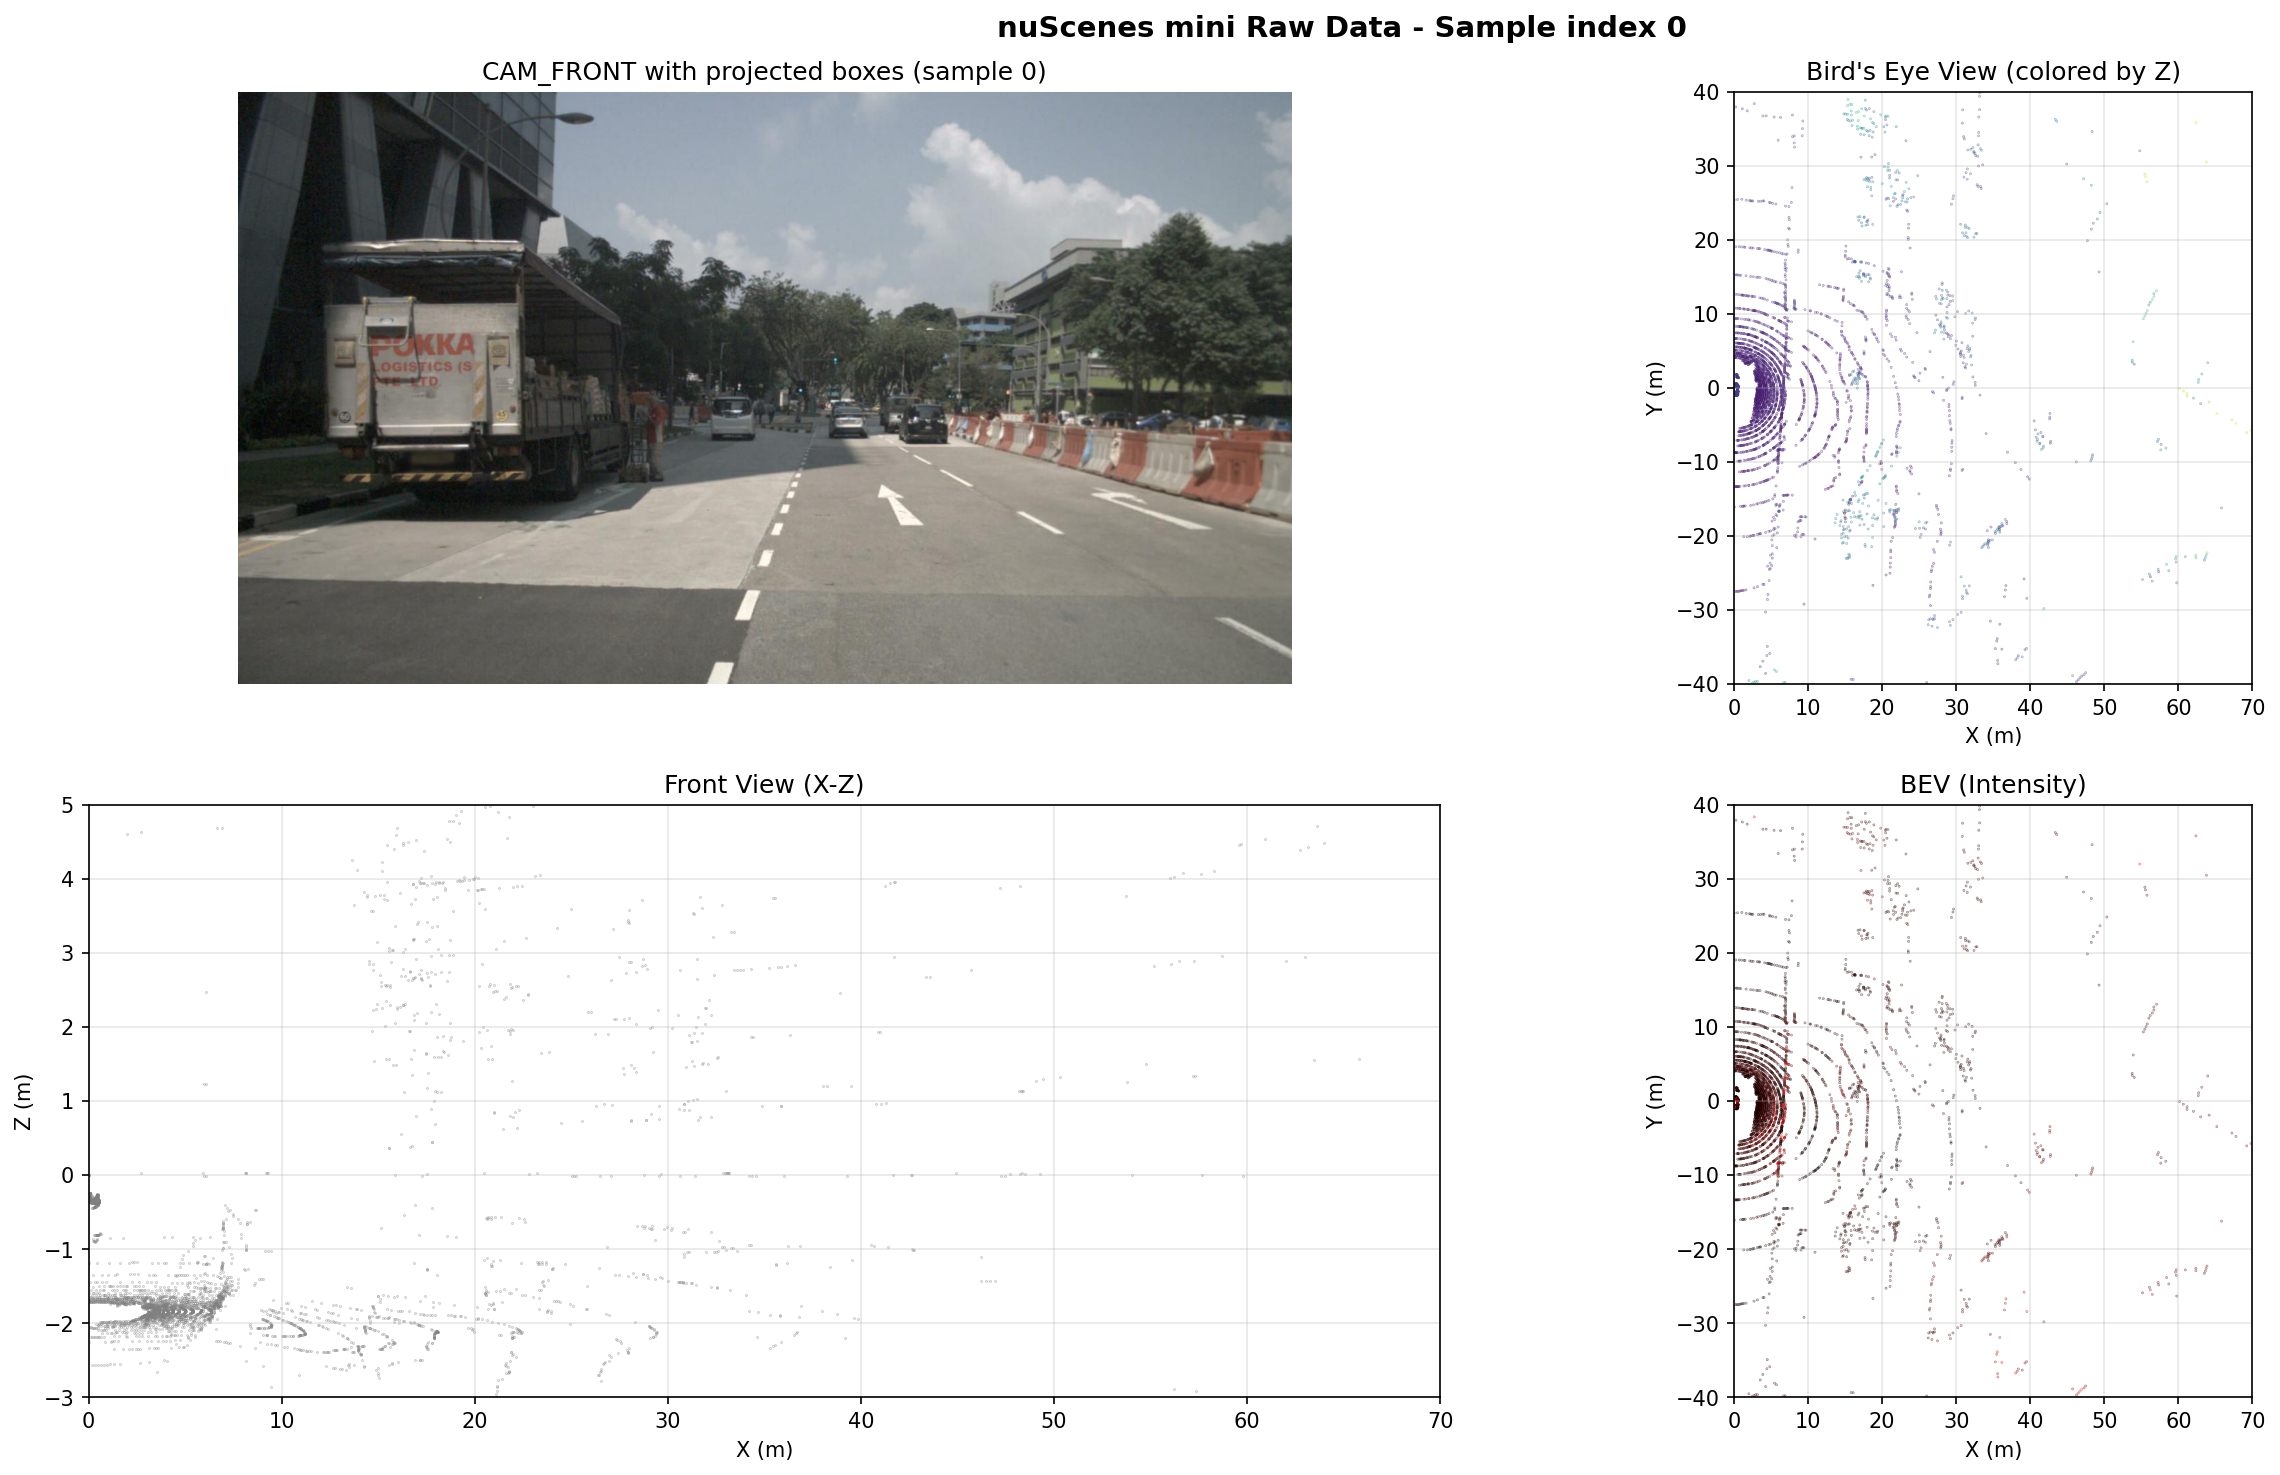

In [ ]:
# Raw 시각화 이미지 표시
from IPython.display import Image, display
display(Image('/content/nuscenes_mini_raw_visualization.png'))

# 11. 데이터 전처리

In [ ]:
from pathlib import Path

OUT_DIR = Path("/content/data/nuscenes")

print("=== nuscenes info pkls ===")
for f in sorted(OUT_DIR.glob("nuscenes_infos_*.pkl")):
    print(" -", f.name, f.stat().st_size)

print("\n=== mini-specific info pkls ===")
for f in sorted(OUT_DIR.glob("*mini*.pkl")):
    print(" -", f.name, f.stat().st_size)


=== nuscenes info pkls ===

=== mini-specific info pkls ===


In [ ]:
import subprocess, os, glob, shutil
from datetime import datetime
from pathlib import Path

print("=" * 70)
print("🔄 nuScenes 데이터 전처리 (v1.0-mini)")
print("=" * 70)
print(f"📅 시작 시간: {datetime.now().strftime('%H:%M:%S')}\n")

# 심볼릭 링크 생성(안전 버전)
os.makedirs('/content/mmdetection3d/data', exist_ok=True)
link_path = '/content/mmdetection3d/data/nuscenes'

if os.path.islink(link_path):
    os.remove(link_path)
elif os.path.exists(link_path):
    # 실디렉터리면 삭제하지 않고 중단(안전)
    raise RuntimeError(f"{link_path} exists and is not a symlink. Refusing to delete.")

os.symlink('/content/data/nuscenes', link_path)
print("🔗 심볼릭 링크 생성 완료\n")

print("📋 생성될 가능성이 높은 파일(예상, mini 기준):")
print("   • nuscenes_infos_mini_train.pkl")
print("   • nuscenes_infos_mini_val.pkl")
print("   • nuscenes_dbinfos_train.pkl (버전/설정에 따라 다를 수 있음)")
print("\n⏳ 전처리 시작...")
print("-" * 70)

env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['PYTHONUNBUFFERED'] = '1'

cmd = [
    '/content/conda/envs/openmmlab/bin/python', '-u',
    '/content/mmdetection3d/tools/create_data.py', 'nuscenes',
    '--root-path', '/content/data/nuscenes',
    '--out-dir', '/content/data/nuscenes',
    '--extra-tag', 'nuscenes',
    '--version', 'v1.0-mini',
    '--workers', '2'
]

process = subprocess.Popen(
    cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1,
    cwd='/content/mmdetection3d'
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)

rc = process.wait()
print("-" * 70)

if rc != 0:
    raise RuntimeError(f"❌ 전처리 실패: return code {rc}")

print("\n✅ 전처리 완료\n")

print("📁 생성된 파일:")
pkls = sorted(glob.glob('/content/data/nuscenes/*.pkl'))
for pkl in pkls:
    size = os.path.getsize(pkl) / 1024 / 1024
    print(f"   {os.path.basename(pkl)}: {size:.1f} MB")

print(f"\n📅 완료 시간: {datetime.now().strftime('%H:%M:%S')}")
print("=" * 70)


🔄 nuScenes 데이터 전처리 (v1.0-mini)
📅 시작 시간: 05:32:42

🔗 심볼릭 링크 생성 완료

📋 생성될 가능성이 높은 파일(예상, mini 기준):
   • nuscenes_infos_mini_train.pkl
   • nuscenes_infos_mini_val.pkl
   • nuscenes_dbinfos_train.pkl (버전/설정에 따라 다를 수 있음)

⏳ 전처리 시작...
----------------------------------------------------------------------
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.662 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
total scene num: 10
exist scene num: 10
train scene: 8, val scene: 2
[                                                  ] 0/404, elapsed: 0s, ETA:
[                                 ] 1/404, 7.8 task/s, elapsed: 0s, ETA:    51s
[                                 ] 2/404, 7.3 task/s, elapsed: 0s, ETA:    55s
[                                 ] 3/404, 6.9 task/s, elapsed: 0s, E

In [ ]:
import pickle
from pathlib import Path

train_pkl = Path("/content/data/nuscenes/nuscenes_infos_train.pkl")
val_pkl   = Path("/content/data/nuscenes/nuscenes_infos_val.pkl")

def load_pkl(path: Path):
    with open(path, "rb") as f:
        return pickle.load(f)

def extract_infos(obj):
    # mmdet3d 버전에 따라 구조가 다를 수 있어 여러 케이스를 처리
    if isinstance(obj, list):
        return obj
    if isinstance(obj, dict):
        for k in ["infos", "data_list", "info", "annotations"]:
            if k in obj and isinstance(obj[k], list):
                return obj[k]
    return None

def summarize(path: Path):
    obj = load_pkl(path)
    infos = extract_infos(obj)
    print(f"\n=== {path.name} ===")
    print("top type:", type(obj))
    if isinstance(obj, dict):
        print("top keys:", list(obj.keys())[:20])
    if infos is None:
        print("Could not find infos list. Please show the structure above.")
        return

    print("num infos:", len(infos))
    # sample token 키 후보
    token_keys = ["token", "sample_token", "sample_idx"]
    for k in token_keys:
        if isinstance(infos[0], dict) and k in infos[0]:
            tokens = [x.get(k) for x in infos[:5]]
            print(f"example {k} (first 5):", tokens)
            break

summarize(train_pkl)
summarize(val_pkl)



=== nuscenes_infos_train.pkl ===
top type: <class 'dict'>
top keys: ['metainfo', 'data_list']
num infos: 323
example token (first 5): ['ca9a282c9e77460f8360f564131a8af5', '39586f9d59004284a7114a68825e8eec', '356d81f38dd9473ba590f39e266f54e5', 'e0845f5322254dafadbbed75aaa07969', 'c923fe08b2ff4e27975d2bf30934383b']

=== nuscenes_infos_val.pkl ===
top type: <class 'dict'>
top keys: ['metainfo', 'data_list']
num infos: 81
example token (first 5): ['3e8750f331d7499e9b5123e9eb70f2e2', '3950bd41f74548429c0f7700ff3d8269', 'c5f58c19249d4137ae063b0e9ecd8b8e', '700c1a25559b4433be532de3475e58a9', '747aa46b9a4641fe90db05d97db2acea']


# 12. 전처리된 데이터 시각화 (GT 3D Box)

In [ ]:
%%bash
PY=/content/conda/envs/openmmlab/bin/python

$PY << 'EOF'
import matplotlib
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt
import pickle, os, glob, sys, traceback
from matplotlib.lines import Line2D

print("=" * 70)
print("📊 전처리된 데이터 시각화 (Ground Truth 3D Box) - nuScenes mini")
print("=" * 70)

LOCAL_NUSC = "/content/data/nuscenes"
OUT_PATH = "/content/nuscenes_preprocessed_visualization.png"

def pick_infos_container(data):
    metainfo = {}
    if isinstance(data, dict):
        metainfo = data.get("metainfo", {}) if isinstance(data.get("metainfo", {}), dict) else {}
        for k in ["data_list", "data_infos", "infos", "ann_infos"]:
            v = data.get(k, None)
            if isinstance(v, list):
                return v, metainfo
        return None, metainfo
    if isinstance(data, list):
        return data, metainfo
    return None, metainfo

def find_infos_train_pkl():
    # ✅ dbinfos 제외 + infos 우선
    cands = sorted(glob.glob(os.path.join(LOCAL_NUSC, "*infos_train*.pkl")))
    cands = [p for p in cands if "dbinfos" not in os.path.basename(p)]
    if cands:
        return cands[0], cands
    return None, []

def find_lidar_path(sample_info):
    lp = sample_info.get("lidar_points", None)
    if isinstance(lp, dict):
        for k in ["lidar_path", "pts_filename", "filename"]:
            if isinstance(lp.get(k, None), str):
                return lp[k]
    for k in ["lidar_path", "pts_filename", "lidar_filename", "lidar_file"]:
        if isinstance(sample_info.get(k, None), str):
            return sample_info[k]
    return None

def load_points(lidar_file):
    raw = np.fromfile(lidar_file, dtype=np.float32)
    if raw.size % 5 == 0:
        return raw.reshape(-1, 5)[:, :4]
    if raw.size % 4 == 0:
        return raw.reshape(-1, 4)
    raise ValueError(f"Unexpected lidar float count: {raw.size} (not divisible by 4 or 5)")

def draw_3d_box_bev(ax, bbox_3d, color):
    x, y, z, dx, dy, dz, yaw = bbox_3d[:7]
    corners = np.array([
        [-dx/2, -dy/2],
        [ dx/2, -dy/2],
        [ dx/2,  dy/2],
        [-dx/2,  dy/2],
        [-dx/2, -dy/2]
    ])
    cos_y, sin_y = np.cos(yaw), np.sin(yaw)
    rot = np.array([[cos_y, -sin_y],
                    [sin_y,  cos_y]])
    corners = corners @ rot.T + np.array([x, y])
    ax.plot(corners[:, 0], corners[:, 1], color=color, linewidth=2)

try:
    info_pkl, candidates = find_infos_train_pkl()
    if info_pkl is None:
        print("❌ *infos_train*.pkl(단, dbinfos 제외)을 찾지 못했습니다.")
        print("📦 PKL 목록:", [os.path.basename(p) for p in sorted(glob.glob(os.path.join(LOCAL_NUSC, '*.pkl')))])
        sys.exit(0)

    print(f"\n📁 사용 파일: {os.path.basename(info_pkl)}")
    if len(candidates) > 1:
        print("   후보:", [os.path.basename(x) for x in candidates])

    with open(info_pkl, "rb") as f:
        data = pickle.load(f)

    infos, metainfo = pick_infos_container(data)
    if not isinstance(infos, list) or len(infos) == 0:
        print("❌ infos 리스트를 찾지 못했습니다.")
        print("type(data):", type(data))
        if isinstance(data, dict):
            print("top-level keys:", list(data.keys())[:50])
        sys.exit(0)

    print(f"📁 infos: {len(infos)} samples")

    classes = metainfo.get("classes", None) if isinstance(metainfo, dict) else None

    # GT 있는 샘플 우선 선택
    sample_info = None
    for cand in infos[:400]:
        inst = cand.get("instances", None) if isinstance(cand, dict) else None
        if isinstance(inst, list) and len(inst) > 0:
            sample_info = cand
            break
    if sample_info is None:
        sample_info = infos[0]

    sample_idx = sample_info.get("sample_idx", "unknown")
    print(f"   선택된 샘플(sample_idx/token): {sample_idx}")

    instances = sample_info.get("instances", None)
    if isinstance(instances, list):
        print(f"   GT 객체 수: {len(instances)}")
    else:
        print("   ⚠️ instances가 없습니다(전처리 결과 포맷 확인 필요).")

    lidar_path = find_lidar_path(sample_info)
    if lidar_path is None:
        print("❌ LiDAR 경로 키를 찾지 못했습니다.")
        print("sample_info keys:", list(sample_info.keys())[:80])
        print("lidar_points:", sample_info.get("lidar_points", None))
        sys.exit(0)

    fname = os.path.basename(lidar_path)

    # 후보 경로들(전처리 pkl 포맷 차이 대응)
    lidar_candidates = [
        lidar_path if os.path.isabs(lidar_path) else os.path.join(LOCAL_NUSC, lidar_path),
        os.path.join(LOCAL_NUSC, "samples", "LIDAR_TOP", fname),
        os.path.join(LOCAL_NUSC, "sweeps",  "LIDAR_TOP", fname),
    ]

    lidar_file = None
    for c in lidar_candidates:
        if os.path.exists(c):
            lidar_file = c
            break

    # 최후: 전체 검색(느릴 수 있지만 mini는 괜찮음)
    if lidar_file is None:
        hits = glob.glob(os.path.join(LOCAL_NUSC, "**", fname), recursive=True)
        if hits:
            lidar_file = hits[0]

    if lidar_file is None:
        print("❌ LiDAR 파일이 없습니다. 후보 경로:", lidar_candidates)
        print("   찾으려던 파일명:", fname)
        sys.exit(0)


    points = load_points(lidar_file)
    print(f"\n   Point Cloud: {points.shape[0]:,} points")
    print(f"   LiDAR file : {lidar_path}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    ax1 = axes[0]
    mask = (points[:, 0] > 0) & (points[:, 0] < 70) & (np.abs(points[:, 1]) < 40)
    pts = points[mask]
    ax1.scatter(pts[::3, 0], pts[::3, 1], s=0.1, c=pts[::3, 2], cmap="viridis", alpha=0.5)

    palette = ['red','blue','green','orange','purple','cyan','magenta','yellow','brown','lime']
    legend_map = {}

    if isinstance(instances, list) and len(instances) > 0:
        for inst in instances:
            bbox = inst.get("bbox_3d", None)
            cls = inst.get("bbox_label_3d", None)
            if bbox is None or cls is None:
                continue
            cls = int(cls)
            color = palette[cls % len(palette)]
            draw_3d_box_bev(ax1, bbox, color)
            if cls not in legend_map:
                name = classes[cls] if (isinstance(classes, (list, tuple)) and cls < len(classes)) else f"Class_{cls}"
                legend_map[cls] = (name, color)

    ax1.set_xlabel("X (m)")
    ax1.set_ylabel("Y (m)")
    ax1.set_title(f"BEV + GT 3D Boxes (sample={sample_idx})")
    ax1.set_xlim([0, 70])
    ax1.set_ylim([-40, 40])
    ax1.set_aspect("equal")
    ax1.grid(True, alpha=0.3)

    if legend_map:
        handles = [Line2D([0],[0], color=c, linewidth=2, label=n) for _, (n, c) in sorted(legend_map.items())]
        ax1.legend(handles=handles, loc="upper right", fontsize=9)

    ax2 = axes[1]
    ax2.scatter(pts[::3, 0], pts[::3, 2], s=0.1, c="gray", alpha=0.5)
    ax2.set_xlabel("X (m)")
    ax2.set_ylabel("Z (m)")
    ax2.set_title("Side View (X-Z)")
    ax2.set_xlim([0, 70])
    ax2.set_ylim([-3, 5])
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color="brown", linestyle="--", alpha=0.5)

    plt.suptitle(f"nuScenes Preprocessed Data - Sample {sample_idx}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.savefig(OUT_PATH, dpi=150, bbox_inches="tight")
    plt.close()

    print(f"\n💾 저장됨: {OUT_PATH}")
    print("=" * 70)

except Exception:
    print("❌ 예외 발생(traceback):")
    traceback.print_exc()
    sys.exit(0)
EOF


📊 전처리된 데이터 시각화 (Ground Truth 3D Box) - nuScenes mini

📁 사용 파일: nuscenes_infos_train.pkl
📁 infos: 323 samples
   선택된 샘플(sample_idx/token): 0
   GT 객체 수: 69

   Point Cloud: 34,688 points
   LiDAR file : n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin

💾 저장됨: /content/nuscenes_preprocessed_visualization.png


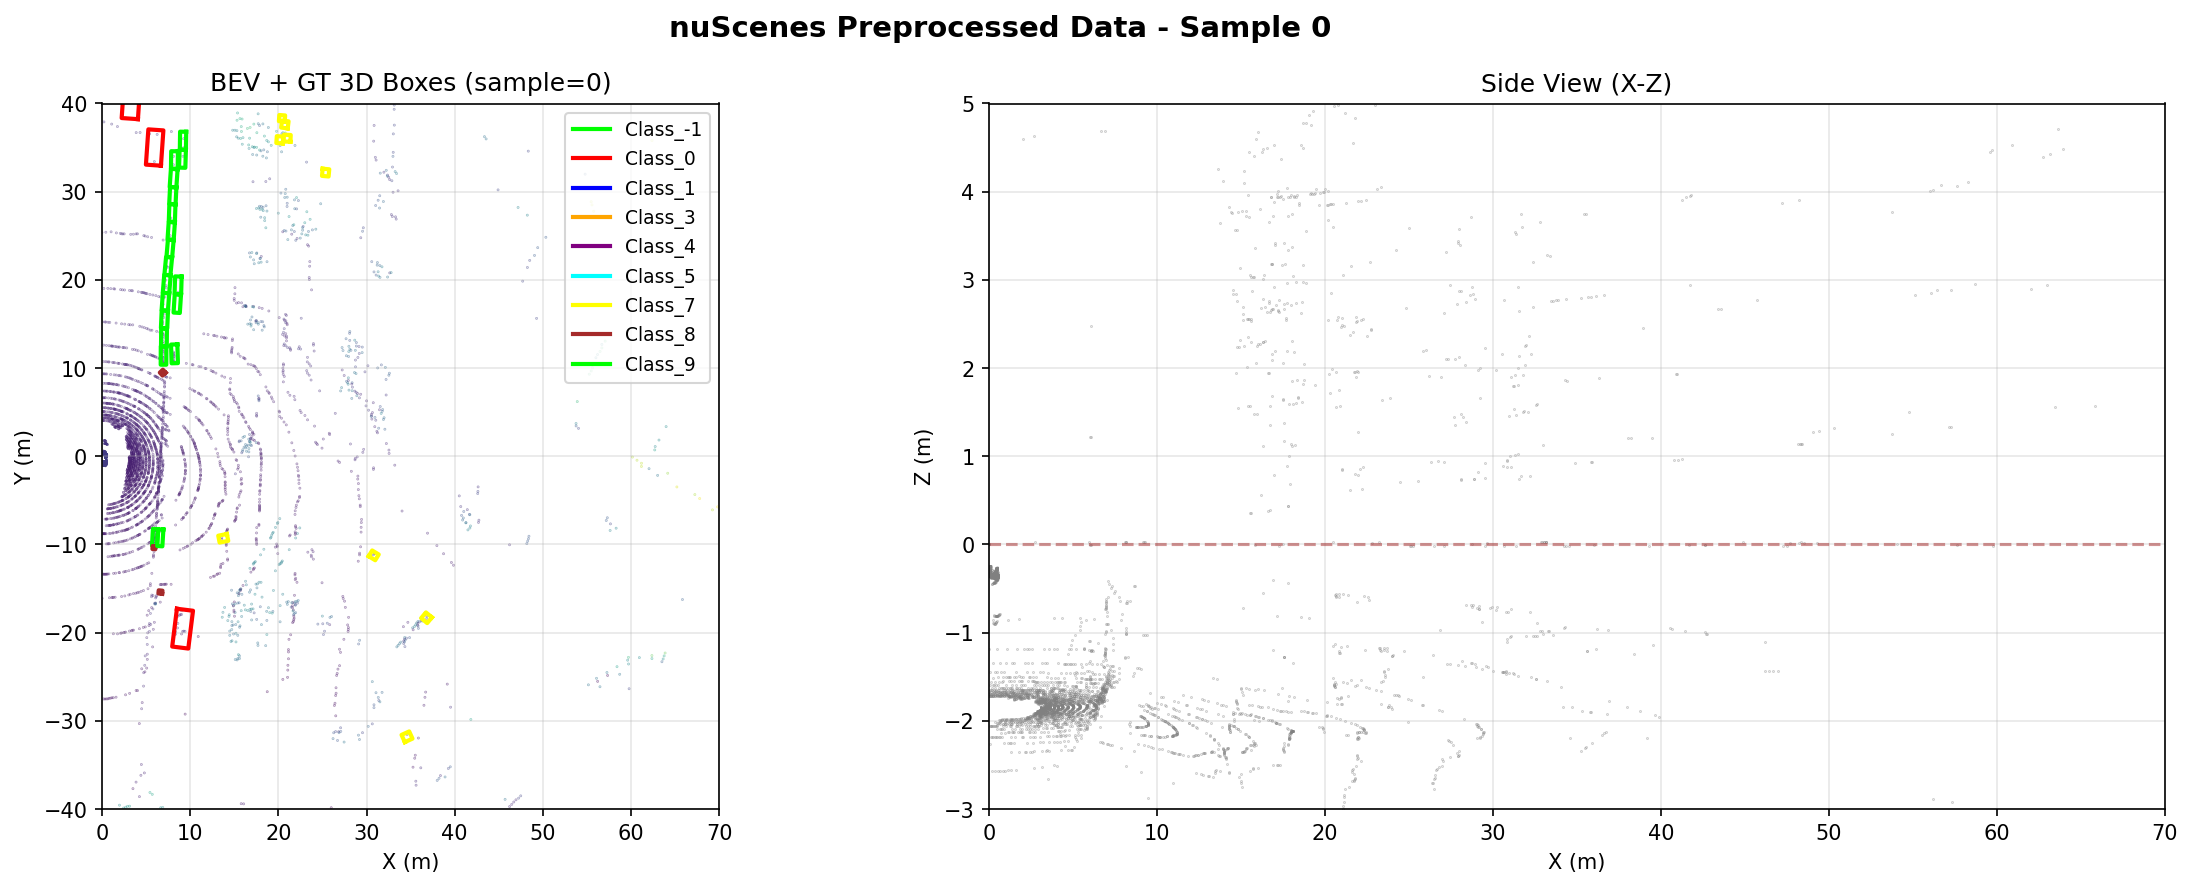

In [ ]:
# 전처리 시각화 이미지 표시
from IPython.display import Image, display
display(Image('/content/nuscenes_preprocessed_visualization.png'))

# 13. Config 파일 생성

In [ ]:
# -*- coding: utf-8 -*-
"""13_create_config_fix.ipynb"""

import os

# 파일 경로 설정
mmdet3d_dir = '/content/mmdetection3d'
config_dir = os.path.join(mmdet3d_dir, 'configs/pointpillars')
base_config = os.path.join(config_dir, 'pointpillars_hv_fpn_sbn-all_8xb4-2x_nus-3d.py')
new_config = os.path.join(config_dir, 'pointpillars_nuscenes_mini_fix.py')

# Config 내용 작성
config_content = f"""
_base_ = ['{base_config}']

# 1. 경로 및 기본 설정
data_root = '/content/data/nuscenes/'
work_dir = '/content/work_dirs/pointpillars_mini_fix'

# 2. 데이터셋 파일 지정 (전처리된 pkl 파일)
train_ann_file = 'nuscenes_infos_train.pkl'
val_ann_file = 'nuscenes_infos_val.pkl'

# 3. Model Head 설정 (Class 개수 10개로 고정)
model = dict(
    bbox_head=dict(
        num_classes=10,
        # anchor 설정 등은 base config 따름
    )
)

# 4. 데이터 파이프라인 및 로더 설정
train_dataloader = dict(
    batch_size=2,  # Colab 메모리 고려
    num_workers=1,
    dataset=dict(
        data_root=data_root,
        ann_file=train_ann_file,
        pipeline=[
            dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=5),
            dict(type='LoadPointsFromMultiSweeps', sweeps_num=10),
            dict(type='LoadAnnotations3D', with_bbox_3d=True, with_label_3d=True),
            dict(type='GlobalRotScaleTrans',
                 rot_range=[-0.3925, 0.3925],
                 scale_ratio_range=[0.95, 1.05],
                 translation_std=[0, 0, 0]),
            dict(type='RandomFlip3D', flip_ratio_bev_horizontal=0.5),
            dict(type='PointsRangeFilter', point_cloud_range=[-50, -50, -5, 50, 50, 3]),
            dict(type='ObjectRangeFilter', point_cloud_range=[-50, -50, -5, 50, 50, 3]),
            dict(type='ObjectNameFilter', classes=[
                'car', 'truck', 'trailer', 'bus', 'construction_vehicle',
                'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier'
            ]),
            dict(type='PointShuffle'),
            dict(type='Pack3DDetInputs', keys=['points', 'gt_bboxes_3d', 'gt_labels_3d'])
        ]
    )
)

val_dataloader = dict(
    batch_size=1,
    num_workers=1,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        data_root=data_root,
        ann_file=val_ann_file,
        pipeline=[
            dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=5),
            dict(type='LoadPointsFromMultiSweeps', sweeps_num=10),
            dict(type='Pack3DDetInputs', keys=['points'])
        ]
    )
)

test_dataloader = val_dataloader

# 5. Evaluator 설정 (AssertionError 핵심 해결 부분)
# version='v1.0-mini'와 eval_set='mini_val'을 명시해야 함
val_evaluator = dict(
    type='NuScenesMetric',
    data_root=data_root,
    ann_file=data_root + val_ann_file, # Metric 계산용 정답지
    version='v1.0-mini',      # <--- 핵심 수정: trainval 대신 mini 사용
    eval_set='mini_val',      # <--- 핵심 수정: validation split 지정
    classes=[
        'car', 'truck', 'trailer', 'bus', 'construction_vehicle',
        'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier'
    ],
    metric='bbox'
)

test_evaluator = val_evaluator

# 6. 학습 스케줄 (빠른 결과를 위해 Epoch 단축)
train_cfg = dict(by_epoch=True, max_epochs=12, val_interval=3)
param_scheduler = [
    dict(type='LinearLR', start_factor=0.001, by_epoch=False, begin=0, end=1000),
    dict(type='MultiStepLR', begin=0, end=12, by_epoch=True, milestones=[8, 11], gamma=0.1)
]

# 7. 로깅 설정
default_hooks = dict(
    logger=dict(type='LoggerHook', interval=50),
    checkpoint=dict(type='CheckpointHook', interval=3)
)
"""

with open(new_config, 'w') as f:
    f.write(config_content)

print(f"✅ Config created at: {new_config}")

✅ Config created at: /content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix.py


# 14. 실험 환경 초기화

In [ ]:
%%bash
# 실험 환경 초기화
echo "========================================================================"
echo "🧹 이전 실험 데이터 정리"
echo "========================================================================"

rm -rf /content/work_dirs/pointpillars_mini_fix
mkdir -p /content/work_dirs/pointpillars_mini_fix

echo "✅ 작업 디렉토리 초기화 완료: /content/work_dirs/pointpillars_mini_fix"

🧹 이전 실험 데이터 정리
✅ 작업 디렉토리 초기화 완료: /content/work_dirs/pointpillars_mini_fix


# 15. 학습 설정 확인

In [ ]:
%%bash
set -e
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

$PY << 'EOF'
from mmengine.config import Config
cfg_path = "/content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix.py"
cfg = Config.fromfile(cfg_path)

print(f"🔎 Config Check: {cfg_path}")
print(f"   • Data Root: {cfg.data_root}")
print(f"   • Train Ann: {cfg.train_dataloader.dataset.ann_file}")
print(f"   • Val Ann  : {cfg.val_dataloader.dataset.ann_file}")
print(f"   • Evaluator Version : {cfg.val_evaluator.version} (Must be 'v1.0-mini')")
print(f"   • Evaluator Eval Set: {cfg.val_evaluator.eval_set} (Must be 'mini_val')")
EOF

🔎 Config Check: /content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix.py
   • Data Root: /content/data/nuscenes/
   • Train Ann: nuscenes_infos_train.pkl
   • Val Ann  : nuscenes_infos_val.pkl
   • Evaluator Version : v1.0-mini (Must be 'v1.0-mini')
   • Evaluator Eval Set: mini_val (Must be 'mini_val')


# 16. 학습 실행

In [ ]:
import subprocess
import os
import sys
from datetime import datetime

# ==============================================================================
# 1. 설정
# ==============================================================================
WORK_DIR = "/content/work_dirs/centerpoint_mini_run"
BATCH_SIZE = "8" # 4~8
MAX_EPOCHS = "20"  # Epoch 24
NUM_WORKERS = "4" # T4 NUM_WORKERS = "2", L4 NUM_WORKERS = "4", A100 NUM_WORKERS = "8"
CHECKPOINT_INTERVAL = "1"

DATA_ROOT = "/content/data/nuscenes"
CONFIG = "/content/mmdetection3d/configs/centerpoint/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
PY = "/content/conda/envs/openmmlab/bin/python"

# Config 존재 확인
if not os.path.exists(CONFIG):
    raise FileNotFoundError(f"❌ Config 파일 없음: {CONFIG}")

# ==============================================================================
# 2. 실행 준비
# ==============================================================================
print("=" * 70)
print("🚀 CenterPoint 학습 시작 (Subprocess Mode)")
print("=" * 70)
print(f"📅 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

os.makedirs(WORK_DIR, exist_ok=True)

env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['PYTHONUNBUFFERED'] = '1'
env['NUMBA_DISABLE_CUDA'] = '1'   # CenterPoint도 안전하게 유지

cmd = [
    PY, '-u',
    '/content/mmdetection3d/tools/train.py',
    CONFIG,
    '--work-dir', WORK_DIR,
    '--cfg-options',
    f'data_root={DATA_ROOT}/',

    f'train_cfg.max_epochs={MAX_EPOCHS}',
    'train_cfg.val_interval=9999',

    f'default_hooks.checkpoint.interval={CHECKPOINT_INTERVAL}',
    'default_hooks.logger.interval=50',

    f'train_dataloader.batch_size={BATCH_SIZE}',
    f'train_dataloader.num_workers={NUM_WORKERS}',
    'val_dataloader.batch_size=1',
    f'val_dataloader.num_workers={NUM_WORKERS}',

    'auto_scale_lr.enable=True',
    'auto_scale_lr.base_batch_size=16',
]

# ==============================================================================
# 3. 실행
# ==============================================================================
print("\n⏳ 학습 시작...\n")

process = subprocess.Popen(
    cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)

ret = process.wait()

if ret != 0:
    print(f"\n❌ 학습 실패 (Exit Code: {ret})")
else:
    print("\n✅ CenterPoint 학습 완료")

print("=" * 70)
print(f"📅 종료 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🚀 CenterPoint 학습 시작 (Subprocess Mode)
📅 시작 시간: 2026-01-15 05:35:19

⏳ 학습 시작...

/content/conda/envs/openmmlab/lib/python3.10/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
01/15 05:35:24 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1486725722
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
    PyTorch: 2.1.2+cu118
  

# 17. 학습 결과 요약

In [ ]:
import os
import glob
import re
from datetime import datetime

print("=" * 70)
print("📊 학습 결과 요약 (Training Summary)")
print("=" * 70)

# ==============================================================================
# 1. 기본 설정 (학습 코드와 동일해야 함)
# ==============================================================================
WORK_DIR = "/content/work_dirs/centerpoint_mini_run"  # CenterPoint면 경로만 변경
LOG_EXTENSIONS = (".log", ".json")

# ==============================================================================
# 2. 체크포인트 요약
# ==============================================================================
print("\n🧠 Checkpoint Summary")
print("-" * 70)

if not os.path.exists(WORK_DIR):
    print(f"❌ Work dir가 존재하지 않습니다: {WORK_DIR}")
    raise SystemExit

ckpts = sorted(glob.glob(os.path.join(WORK_DIR, "epoch_*.pth")))

if not ckpts:
    print("❌ 생성된 checkpoint (.pth)가 없습니다.")
else:
    print(f"✅ 총 {len(ckpts)}개의 checkpoint 생성됨")

    for ckpt in ckpts:
        size_mb = os.path.getsize(ckpt) / 1024 / 1024
        epoch = os.path.basename(ckpt).replace("epoch_", "").replace(".pth", "")
        print(f"   • Epoch {epoch:>2} | {size_mb:6.1f} MB")

    print(f"\n🏁 최종 모델: {os.path.basename(ckpts[-1])}")

# ==============================================================================
# 3. 로그 파일 탐색
# ==============================================================================
print("\n📄 Log File Summary")
print("-" * 70)

log_files = []
for ext in LOG_EXTENSIONS:
    log_files.extend(glob.glob(os.path.join(WORK_DIR, f"*{ext}")))

if not log_files:
    print("⚠️ 로그 파일을 찾을 수 없습니다.")
    print("   (logger 설정이 꺼져 있거나 Colab 세션 문제일 수 있음)")
else:
    for log in log_files:
        print(f"   • {os.path.basename(log)}")

# ==============================================================================
# 4. Loss 변화 간단 분석 (텍스트 로그 기준)
# ==============================================================================
print("\n📉 Training Loss Trend (간단 분석)")
print("-" * 70)

loss_pattern = re.compile(r"loss[:=]\s*([0-9.]+)")

loss_values = []

for log in log_files:
    if not log.endswith(".log"):
        continue

    with open(log, "r", errors="ignore") as f:
        for line in f:
            m = loss_pattern.search(line)
            if m:
                loss_values.append(float(m.group(1)))

if not loss_values:
    print("⚠️ loss 정보를 로그에서 찾지 못했습니다.")
else:
    print(f"총 {len(loss_values)}개의 loss 기록 발견")
    print(f"   • 초기 loss : {loss_values[0]:.4f}")
    print(f"   • 최종 loss : {loss_values[-1]:.4f}")

    if loss_values[-1] < loss_values[0]:
        print("   ✅ Loss 감소 확인 → 학습 정상 진행")
    else:
        print("   ⚠️ Loss 감소가 명확하지 않음 (학습 설정 점검 필요)")

# ==============================================================================
# 5. 최종 요약
# ==============================================================================
print("\n🧾 최종 요약")
print("-" * 70)

print(f"📁 Work Dir        : {WORK_DIR}")
print(f"📦 Checkpoints     : {len(ckpts)} 개")
if ckpts:
    print(f"🏁 Final Model     : {os.path.basename(ckpts[-1])}")
print(f"📄 Log Files       : {len(log_files)} 개")
print(f"🕒 Summary Time    : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

print("=" * 70)
print("✅ 학습 결과 요약 완료")

# 18. validation 평가

In [ ]:
%%bash
# ------------------------------------------------------------------
# 1. 환경 변수 및 인터프리터 설정
# ------------------------------------------------------------------
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

echo "========================================================================"
echo "📊 CenterPoint Validation Evaluation (nuScenes mini)"
echo "========================================================================"

# ------------------------------------------------------------------
# 2. Python 스크립트 실행
# ------------------------------------------------------------------
$PY << 'EOF'
import os
import glob
import subprocess
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

# --------------------------------------------------
# 설정 (학습 / inference와 반드시 동일)
# --------------------------------------------------
config_file = "/content/mmdetection3d/configs/centerpoint/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
work_dir = "/content/work_dirs/centerpoint_mini_run"
data_root = "/content/data/nuscenes"
py = "/content/conda/envs/openmmlab/bin/python"

print("=" * 70)
print("🔍 CenterPoint Validation 평가 시작")
print("=" * 70)
print(f"📅 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# --------------------------------------------------
# 최신 체크포인트 자동 탐색
# --------------------------------------------------
checkpoints = sorted(
    glob.glob(os.path.join(work_dir, "epoch_*.pth")),
    key=os.path.getmtime
)

if not checkpoints:
    print("❌ 체크포인트가 없습니다. 학습을 먼저 수행하세요.")
    raise SystemExit

ckpt = checkpoints[-1]
print(f"📌 사용 체크포인트: {os.path.basename(ckpt)}")

# --------------------------------------------------
# Evaluation 명령 구성
# --------------------------------------------------
cmd = [
    py,
    "/content/mmdetection3d/tools/test.py",
    config_file,
    ckpt,
    "--cfg-options",
    f"data_root={data_root}/",

    # mini 환경 안정화
    "test_dataloader.batch_size=1",
    "test_dataloader.num_workers=2",

    # nuScenes 공식 metric
    "val_evaluator.type=NuScenesMetric",
    "val_evaluator.metric=lidar",
]

print("\n🚀 Evaluation Command:")
print(" ".join(cmd))
print("-" * 70)

# --------------------------------------------------
# Evaluation 실행
# --------------------------------------------------
process = subprocess.Popen(
    cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1
)

try:
    for line in iter(process.stdout.readline, ''):
        print(line, end='', flush=True)
    process.wait()
except KeyboardInterrupt:
    process.terminate()
    print("\n⚠️ 사용자에 의해 평가가 중단되었습니다.")

print("=" * 70)
print("✅ CenterPoint Validation 평가 완료")
print(f"📅 종료 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
EOF

In [ ]:
import glob
from IPython.display import display, Markdown

print("=" * 70)
print("📈 CenterPoint Validation 결과 요약")
print("=" * 70)

WORK_DIR = "/content/work_dirs/centerpoint_mini_run"

# mmengine / nuscenes evaluator 결과 파일 탐색
json_files = sorted(glob.glob(f"{WORK_DIR}/*.json"))

if not json_files:
    print("⚠️ Evaluation 결과 json 파일을 찾지 못했습니다.")
    print("   (콘솔 출력에 mAP / NDS는 정상 출력됐을 수 있음)")
else:
    for jf in json_files:
        print(f"📄 결과 파일: {jf}")
        display(Markdown(f"**Result file:** `{jf}`"))

# 19. inference 테스트

# 20. detection 결과 시각화

# 21. 다중 샘플 비교

# 22. 결과 다운로드/백업

# 21. 3D Detection 결과 카메라 이미지 투영 (Camera Projection)

In [ ]:
%%bash
# ------------------------------------------------------------------
# 1. 환경 설정
# ------------------------------------------------------------------
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

echo "========================================================================"
echo "📸 CenterPoint 3D Detection → Camera Projection"
echo "========================================================================"

# ------------------------------------------------------------------
# 2. Python 스크립트 실행
# ------------------------------------------------------------------
$PY << 'EOF'
import torch
from mmdet3d.apis import init_model, inference_detector
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from pyquaternion import Quaternion
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cv2
import os
import glob
import warnings

warnings.filterwarnings("ignore")

# ---------------------------------------------------------
# 유틸 함수 (네 코드 그대로)
# ---------------------------------------------------------
def view_points(points, view, normalize: bool):
    assert view.shape[0] <= 4
    assert view.shape[1] <= 4
    assert points.shape[0] == 3

    viewpad = np.eye(4)
    viewpad[:view.shape[0], :view.shape[1]] = view

    nbr_points = points.shape[1]
    points = np.concatenate((points, np.ones((1, nbr_points))))
    points = np.dot(viewpad, points)
    points = points[:3, :]

    if normalize:
        points = points / points[2:3, :].repeat(3, 0).reshape(3, nbr_points)

    return points

def check_box_in_image(box, intrinsic, imsize):
    corners_3d = box.corners()
    corners_img = view_points(corners_3d, intrinsic, normalize=True)[:2, :]

    visible = (corners_img[0, :] > 0) & (corners_img[0, :] < imsize[0])
    visible &= (corners_img[1, :] > 0) & (corners_img[1, :] < imsize[1])
    visible &= (corners_3d[2, :] > 1.0)

    return np.any(visible)

# ---------------------------------------------------------
# 메인 로직
# ---------------------------------------------------------
try:
    # --------------------------------------------------
    # 설정 (CenterPoint 기준)
    # --------------------------------------------------
    config_file = "/content/mmdetection3d/configs/centerpoint/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
    work_dir = "/content/work_dirs/centerpoint_mini_run"
    data_root = "/content/data/nuscenes"
    version = "v1.0-mini"

    SCORE_THR = 0.25
    sample_indices = [0, 5, 20]

    # --------------------------------------------------
    # 체크포인트 자동 탐색
    # --------------------------------------------------
    checkpoints = sorted(glob.glob(os.path.join(work_dir, "epoch_*.pth")), key=os.path.getmtime)
    if not checkpoints:
        print("❌ 체크포인트가 없습니다.")
        exit()

    checkpoint_file = checkpoints[-1]
    print(f"📌 Model checkpoint: {os.path.basename(checkpoint_file)}")

    # --------------------------------------------------
    # 모델 로드
    # --------------------------------------------------
    model = init_model(config_file, checkpoint_file, device="cuda:0")

    # --------------------------------------------------
    # nuScenes 메타데이터 로드
    # --------------------------------------------------
    print("⏳ Loading nuScenes metadata...")
    nusc = NuScenes(version=version, dataroot=data_root, verbose=False)

    for idx in sample_indices:
        sample = nusc.sample[idx]
        print(f"\n📍 Processing sample index: {idx}")

        # LiDAR
        sd_lidar = nusc.get("sample_data", sample["data"]["LIDAR_TOP"])
        lidar_path = os.path.join(data_root, sd_lidar["filename"])

        # Camera
        sd_cam = nusc.get("sample_data", sample["data"]["CAM_FRONT"])
        cam_path = os.path.join(data_root, sd_cam["filename"])

        img = cv2.imread(cam_path)
        if img is None:
            print(f"❌ Failed to load image: {cam_path}")
            continue

        # --------------------------------------------------
        # Inference
        # --------------------------------------------------
        result, _ = inference_detector(model, lidar_path)

        pred_bboxes = result.pred_instances_3d.bboxes_3d.tensor.cpu().numpy()
        pred_scores = result.pred_instances_3d.scores_3d.cpu().numpy()
        pred_labels = result.pred_instances_3d.labels_3d.cpu().numpy()

        # --------------------------------------------------
        # 좌표계 변환 정보
        # --------------------------------------------------
        cs_lidar = nusc.get("calibrated_sensor", sd_lidar["calibrated_sensor_token"])
        pose_lidar = nusc.get("ego_pose", sd_lidar["ego_pose_token"])

        cs_cam = nusc.get("calibrated_sensor", sd_cam["calibrated_sensor_token"])
        pose_cam = nusc.get("ego_pose", sd_cam["ego_pose_token"])

        lidar2ego_r = Quaternion(cs_lidar["rotation"])
        lidar2ego_t = np.array(cs_lidar["translation"])

        ego2global_r = Quaternion(pose_lidar["rotation"])
        ego2global_t = np.array(pose_lidar["translation"])

        global2ego_cam_r = Quaternion(pose_cam["rotation"]).inverse
        global2ego_cam_t = -np.array(pose_cam["translation"])

        ego2cam_r = Quaternion(cs_cam["rotation"]).inverse
        ego2cam_t = -np.array(cs_cam["translation"])

        cam_intrinsic = np.array(cs_cam["camera_intrinsic"])

        drawn = 0

        for i, bbox in enumerate(pred_bboxes):
            if pred_scores[i] < SCORE_THR:
                continue

            x, y, z, dx, dy, dz, yaw = bbox[:7]

            box = Box(
                [x, y, z + dz / 2],
                [dy, dx, dz],
                Quaternion(axis=[0, 0, 1], angle=yaw)
            )

            # LiDAR → Ego → Global → Ego(cam) → Camera
            box.rotate(lidar2ego_r)
            box.translate(lidar2ego_t)

            box.rotate(ego2global_r)
            box.translate(ego2global_t)

            box.translate(global2ego_cam_t)
            box.rotate(global2ego_cam_r)

            box.translate(ego2cam_t)
            box.rotate(ego2cam_r)

            if not check_box_in_image(box, cam_intrinsic, (1600, 900)):
                continue

            # 색상 (nuScenes 기준)
            if pred_labels[i] == 0:
                color = (0, 255, 0)      # Car
            elif pred_labels[i] == 7:
                color = (0, 255, 255)    # Pedestrian
            else:
                color = (255, 255, 0)

            box.render_cv2(
                img,
                view=cam_intrinsic,
                normalize=True,
                colors=(color, color, color),
                linewidth=2
            )
            drawn += 1

        save_path = f"/content/camera_proj_result_{idx}.jpg"
        cv2.imwrite(save_path, img)
        print(f"   ✅ Projected {drawn} boxes → {save_path}")

except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()
EOF

In [ ]:
import glob
from IPython.display import Image, display

print("=" * 70)
print("📸 CenterPoint Camera Projection 결과 확인")
print("=" * 70)

image_files = sorted(glob.glob("/content/camera_proj_result_*.jpg"))

if not image_files:
    print("❌ 이미지가 생성되지 않았습니다.")
else:
    for img_path in image_files:
        print(f"📂 파일: {img_path}")
        display(Image(img_path))
        print("-" * 50)